### Defeated Baseline Count

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from evaldata import EvalData

In [2]:
BASE = 'AnomalyDetection_NabData_Txt\\'

# measure = 'Accuracy'
#measure = 'Precision'
# measure = 'Recall'
measure = 'f-measure'
# measure = 'cohen_kappa_score'
# measure = 'auc'

title = ''
if measure == 'f-measure':
    SUB = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉")
    title = 'F1 Score'.translate(SUB)
elif measure == 'cohen_kappa_score':
    title = 'Cohen Kappa Score'
elif measure == 'auc':
    title = 'Area Under Curve'
else:
    title = measure

ed = EvalData()
data = ed.get_data(BASE, measure)
data.shape

Eval Data Object Created


(9, 46)

In [3]:
import numpy as np

ds_names = np.array(['realKnownCause: ambient_temperature_system_failure',
'realKnownCause: cpu_utilization_asg_misconfiguration',
'realKnownCause: ec2_request_latency_system_failure',
'realKnownCause: machine_temperature_system_failure',
'realKnownCause: nyc_taxi',
'realKnownCause: rogue_agent_key_hold',
'realKnownCause: rogue_agent_key_updown',
'realTraffic: occupancy_6005',
'realTraffic: occupancy_t4013',
'realTraffic: speed_6005',
'realTraffic: speed_7578',
'realTraffic: speed_t4013',
'realTraffic: TravelTime_387',
'realTraffic: TravelTime_451',
'realTweets: Twitter_volume_AAPL',
'realTweets: Twitter_volume_AMZN',
'realTweets: Twitter_volume_CRM',
'realTweets: Twitter_volume_CVS',
'realTweets: Twitter_volume_FB',
'realTweets: Twitter_volume_GOOG',
'realTweets: Twitter_volume_IBM',
'realTweets: Twitter_volume_KO',
'realTweets: Twitter_volume_PFE',
'realTweets: Twitter_volume_UPS',
'realAWSCloudwatch: ec2_cpu_utilization_5f5533',
'realAWSCloudwatch: ec2_cpu_utilization_24ae8d',
'realAWSCloudwatch: ec2_cpu_utilization_53ea38',
'realAWSCloudwatch: ec2_cpu_utilization_77c1ca',
'realAWSCloudwatch: ec2_cpu_utilization_825cc2',
'realAWSCloudwatch: ec2_cpu_utilization_ac20cd',
'realAWSCloudwatch: ec2_cpu_utilization_fe7f93',
'realAWSCloudwatch: ec2_disk_write_bytes_1ef3de',
'realAWSCloudwatch: ec2_disk_write_bytes_c0d644',
'realAWSCloudwatch: ec2_network_in_5abac7',
'realAWSCloudwatch: ec2_network_in_257a54',
'realAWSCloudwatch: elb_request_count_8c0756',
'realAWSCloudwatch: grok_asg_anomaly',
'realAWSCloudwatch: iio_us-east-1_i-a2eb1cd9_NetworkIn',
'realAWSCloudwatch: rds_cpu_utilization_cc0c53',
'realAWSCloudwatch: rds_cpu_utilization_e47b3b',
'realAdExchange: exchange-2_cpc_results',
'realAdExchange: exchange-2_cpm_results',
'realAdExchange: exchange-3_cpc_results',
'realAdExchange: exchange-3_cpm_results',
'realAdExchange: exchange-4_cpc_results',
'realAdExchange: exchange-4_cpm_results'])


def pairwiseComperisonDIdx(data, mod_no):
    
    idx = mod_no
    models = ['MadGan', 'AutoEncoder', 'VanLstm', 'IsoForest', 'GMM', 'OcSVM', 'BiLstmGan', 'CnnGan', 'MTSAaGAN']
    data = data.transpose()
    tm = np.array([row[8] for row in data])
    bm = np.array([row[idx] for row in data])
    idx_list = []
    for idx, _ in enumerate(tm):
        if tm[idx] < bm[idx]:
            idx_list.append(idx)
            #print('dataset', (idx+1))
    return idx_list

beat_dist = np.full(46,8)
for mod_no in range(8):
    idxs = pairwiseComperisonDIdx(data, mod_no)
    for idx in idxs:
        beat_dist[idx]-=1
    
beat_dist

array([4, 6, 8, 6, 8, 5, 7, 6, 8, 8, 8, 8, 3, 6, 7, 6, 8, 7, 6, 7, 5, 8,
       8, 8, 4, 8, 8, 8, 1, 7, 8, 8, 5, 4, 8, 6, 7, 7, 5, 5, 8, 8, 6, 6,
       7, 7])

In [4]:
colors = []
color = 0
prev = ''
for idx, name in enumerate(ds_names):
    folder, fname = name.split(': ')
    if prev!= folder:
        color += 1
        prev=folder
    colors.append(color)
        
colors1 = np.array(['r', 'g', 'b', 'y', 'm', 'c'])[colors]
colors1

array(['g', 'g', 'g', 'g', 'g', 'g', 'g', 'b', 'b', 'b', 'b', 'b', 'b',
       'b', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'm', 'm',
       'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm',
       'm', 'c', 'c', 'c', 'c', 'c', 'c'], dtype='<U1')

In [5]:
import pandas as pd
base2 = 'C:\\Users\\basharm\\OneDrive - Queensland University of Technology\\JupyterPythonQUT\\Verton\\AnomalyDetection_Temp\\AnomalyDetectionData\\NabDataset\\data\\'
point_count = []
for idx, name in enumerate(ds_names):
    folder, fname = name.split(': ')
    df = pd.read_csv(base2+folder+'\\'+fname+'.csv')
    point_count.append(len(df))

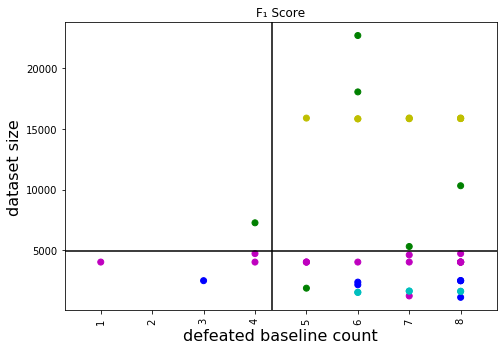

In [6]:
(unique, counts) = np.unique(beat_dist, return_counts=True)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
#plt.xlim(0, 47)
plt.xticks(range(47), rotation=90)
plt.xlabel('defeated baseline count', fontsize=16)
#plt.ylim(0, 8.5)
plt.ylabel('dataset size', fontsize=16)
#plt.grid()
plt.title('F1 Score'.translate(SUB))
plt.scatter(beat_dist, point_count, color=colors1)
ax.plot([.48, .48], [0, 1], transform=ax.transAxes, color='k')
ax.plot([0, 1], [.207, .207], transform=ax.transAxes, color='k')
#plt.bar(range(1,47), beat_dist, color=colors1)
plt.show()